<a href="https://colab.research.google.com/github/davidkant/mai/blob/master/tutorial/8_1_Single_Layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#8.1 Single Layer Perceptron
Chapter 8 is all about Neural Networks! In this section we'll learn how to work with neural networks in Python, starting with a simple but historically interesting neural network, called the perceptron.

# Setup
We'll be using the neural network library [`keras`](https://keras.io/) in addition to some of the other usual suspects.

In [0]:
# install external libraries
from IPython.display import clear_output
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!apt-get -q install ffmpeg
clear_output()

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
import mai.nn as nn

Using TensorFlow backend.


# About the perceptron
The perceptron is a single-layer, feedforward artifical neural network architecture intended for classification. It was developed in the late 1950’s at the Cornell Aeronautical Laboratory by Frank Rosenblat, and built in both software and hardware. The hardware implementation, the Mark I Perceptron, was intended for image recognition, and had 400  photocells (pixels). The network weights were implemented with potentiometers  and set by electric motors — that's a lot of wiring! Lucky for us, we'll be working in software.

In a perceptron, the are no hidden layers, and the inputs are connected directly to the output neurons. Below is a typical network digram of a single layer perceptron with `2` input cells (in red) and `2` neurons (in green).

![single layer percetron](https://raw.githubusercontent.com/davidkant/aim80L/master/resources/img/SLP.png)

**figure:** network diagram of a `2` by  `2` single layer perceptron

# Construct the neural network
Let's build a perceptron with `2` inputs and `2` neurons. With keras, networks are constructed by creating an empty model and then adding layers to it. The perceptron has only one layer of neurons, which serves as the output layer. When we add a layer, we specify the number of neurons in the layer, the number of inputs to the layer, and the activation function using keyword arguments:

* `units` is the number of neurons
* `input_dim` is the number of dimensions of the input data
* `activation` is the activation function

The final step is to compile the network. This is where we specify training algorithm, but don't worry about those details yet. Just know that the algorithm we are using is a form of *gradient descent*.


In [0]:
# create an empty ANN
model = Sequential()

# add one layer
model.add(Dense(units=2, input_dim=2, activation='softmax'))

# compile the model (don't worry about the arguments here)
model.compile(loss ='binary_crossentropy',
              optimizer=SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

Call `model.summary()` to print network information.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


# Generate the training data
What happens if we feed input values through our  newly constucted network? When first constructed, the network behaves pretty much randomly. This is because the values of the interneuronal weights determine how the network responds to input data, and the network is initialized with random weights, so its behavior is pretty much random. 

Neural Networks, however, can be ***trained*** to behave in specific ways using a ***training set***. A training set describes the desired behavior of the network in terms of example `input/output` pairs of data, which give the desired output values `Y` for example input values `X`. Each `input/output` pair is called a ***sample***.

The cell below defines a training data set in which each input value is associated with one of two categories, called classes (plotted as yellow and purple dots below). Let's see if we can get the perceptron to learn to associate each input value with the correct class.

Note that the training data *must* fit the the dimensions of the neural network — in our case, two inputs and two outputs. In the cell below, each `input/output` pair has two input values and two outputs values. There is one output neuron for each of the two possible classes. This is kind of representation, where each class is represented by a separate output neuron, is called a ***one hot encoding***.

You might be wondering, why do we need a separate output neuron for each class, can't we just use one neuron and say that `0` is one class and  `1` is the other class? Yes, BUT, one hot encodings structure data in a way that is easier for neural networks to learn, given the constraints on the kinds of patterns neural networks can learn. Hopefully by the end of section 8.2 you'll be able to explain why.



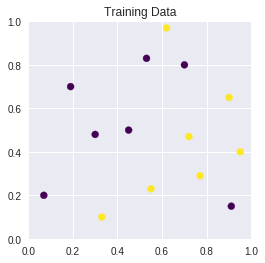

In [0]:
# list of input/output pairs
training_data = [
    ((0.07, 0.20), (1, 0)),
    ((0.19, 0.70), (1, 0)),
    ((0.30, 0.48), (1, 0)),
    ((0.45, 0.50), (1, 0)),
    ((0.53, 0.83), (1, 0)),
    ((0.70, 0.80), (1, 0)),
    ((0.91, 0.15), (1, 0)),
    ((0.33, 0.10), (0, 1)),
    ((0.55, 0.23), (0, 1)),
    ((0.62, 0.97), (0, 1)),
    ((0.72, 0.47), (0, 1)),
    ((0.77, 0.29), (0, 1)),
    ((0.90, 0.65), (0, 1)),
    ((0.95, 0.40), (0, 1)),
]

# split input and output data into two separate lists
x_train = np.array([x for x,y in training_data])
y_train = np.array([y for x,y in training_data])

# plot
plt.figure(figsize=(4,4))
plt.scatter(x_train[:,0], x_train[:,1], c=plt.cm.viridis(y_train.argmax(axis=1).astype(float)))
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('Training Data')
plt.show()

# Train the neural network
Training is the processes of adjusting the network weights such that the actual network outputs match as closely as possible the desired network outputs given by the training data. The weights of the Mark I Perceptron were adjusted mechanically using motors and variable resistors, but we'll do this in software for now... With `keras`, the nueral network is trained by calling the `model.fit()` — training is also called "fitting" because we are fitting the parameters of the model to the training data. There are a few arguments to be aware of:  
* `epochs` is how many times we iterate through the training data
* `batch_size` determines how often the weights are adjusted, in this case, every `7` samples

When you run this cell you'll see a print out of training status once every epoch. Keep an eye on the network accuracy (`acc:`). This tells us how closely the network outputs match the desired outputs. Ideally, the accuracy increases as we train the network, and eventually levels off, indicating that the network performance has stopped improving. What is the final accurancy when you run the cell below?

In [0]:
model.fit(x_train, y_train,
          epochs=100,
          batch_size=14,
          verbose=1) # set verbose=0 to suppress output

# And now we can tell the future!
Here comes the fun part. Now that the network is trained, we can use it to predict the values of new samples — i.e., samples *not* included in the training set. This is the power of neural networks; they are able to extrapolate structural trends from training data and predict the values of new data points according to those trends. I'm being a bit vague there, but we'll try to pin down exactly what is meant by words like "extrapolate" and "generalize" a little later... Predict by calling `model.predict()`.

In [0]:
# a new data point
x_test = [0.25, 0.70]

# convert to numpy array
x_test = np.array([x_test])

# precict the output value
y_test = model.predict(x_test)

# print it
print("Predicted output: {}".format(y_test[0]))

Predicted output: [0.7080788  0.29192126]


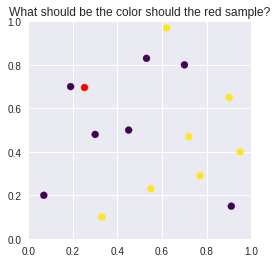

In [0]:
# plot the mystery sample
plt.figure(figsize=(4,4))
plt.scatter(x_train[:,0], x_train[:,1], c=plt.cm.viridis(y_train.argmax(axis=1).astype(float)))
plt.scatter(x_test[:,0], x_test[:,1], c='r')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('What should be the color should the red sample?')
plt.show()

Wait a minute, how come the output of `model.predict()` isn't either `[0,1]` or `[1,0]` like the trainig data?!?! Remember, the network outputs are the ***activations of the neurons*** in that last (output) layer, and often we use activation functions that are *not* binary, meaning they can take on any value between `0` and `1`, sometimes even negative values, it all depends on the activation function chosen. 

This just means that there's one final step of interpreting the output neuron activations before we have our prediction. Often the activations are interpreted as *likelihoods* that a neuron is *on* (`1`) or *off* (`0`). I'm going to keep things simple, and say "whichever activation is greater is on and the other neuron is off," but I'm sure you can imagine more interesting and sophisticated ways of interpreting the activations, perhaps even some way of measuring the network's confidence in its result?

# Many many predictions
We can get a better sense of what the network has learned by visualizing the results of many predictions. To do so, generate a bunch of random `X` values and predict the corresponding `Y` values. We'll call this our ***`test`*** data.

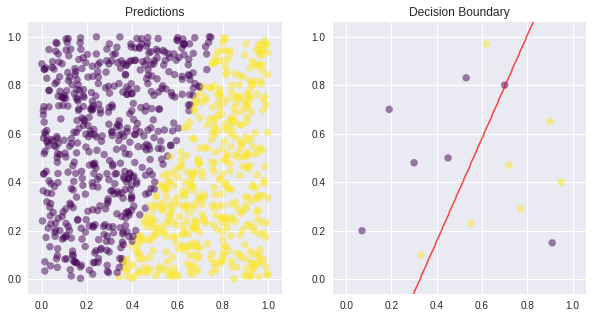

In [0]:
# generate 1000 random test input X values
x_test = np.random.random((1000, 2))

# predict the corresponding output Y values
y_test = model.predict(x_test, batch_size=128)

# plot
nn.prediction_and_boundary_plot(model, x_test, y_test, x_train, y_train)

The prediction plot (left) visualizes the network predictions over a set of random input values. The boundary plot (right) draws a red line along this border between classes, called the ***decision boundary***, overlaid on the original training data.

No, it's not perfect. There's one yellow point on the wrong side of the boundary and one purple point on the wrong side of the boundary. These two points are classified incorrectly and are why the network accuracy never reached `100.0%` during training. Can you explain why the network fails to classify these points correctly? Hint, what shape is the boundary?

# All in one place
Let's put everything together into one cell. The class course repsoitory contains functions for constructing networks, generating training data, and visualizing networks in `mai.nn`. Try chaning things like the `epochs`, test data size, or training data and see how the outcome changes.

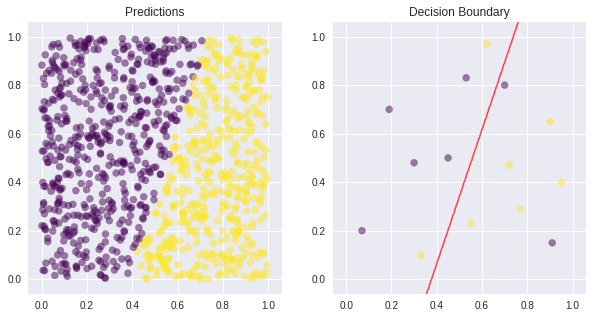

In [0]:
# create a new NN
model = nn.singleLayerPerceptron()

# training data
x_train, y_train = nn.training_data_platinum_records()

# fit the NN
model.fit(x_train, y_train, epochs=100, batch_size=7, verbose=0)

# generate test data
x_test = np.random.random((1000, 2))

# predict test data outputs
y_test = model.predict(x_test)

# plot it
nn.prediction_and_boundary_plot(model, x_test, y_test, x_train, y_train)

# Animated
Neural networks are trained gradually over many iterations — wouldn't it be nice to see the entire process rather than just the final result? The cell below trains a network as above, but plots an animation of the prediciton and decision boundary plots iteration by iteration, allowing us to visualize the network state each step of the way.

In [0]:
# create a new NN
model = nn.singleLayerPerceptron()

# training data
x_train, y_train = nn.training_data_platinum_records()

# generate test data
x_test = np.random.random((700, 2))

# animate it
nn.prediction_and_boundary_animation(model, x_train, y_train, x_test, batch_size=7, frames=200, epochs_per_frame=2)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'animated'
  s)


# The dreaded XOR function
Neural networks have a somewhat complicated history. Although the ideas have been around since the early days of AI — McCulloch and Pitts published [an important early paper](https://link.springer.com/article/10.1007/BF02478259) as far back as 1943 — neural networks have come in and out of fashion more than once. One comlicated issue in that history is the [XOR](https://en.wikipedia.org/wiki/XOR_gate) function.

Now let's try training a perceptron to learn a different data set. The function `aim.nn.generate_training_data()` can be passed an argument `func` to generate a trainin set using a custom function. The cell below generates a training set in which input points are classificed according to the XOR function of their two values. Let's see how the perceptron does... The XOR function is illustrated by the colors of the points in the decision boundary plot on the left: the points are divided into four corner alternating color.

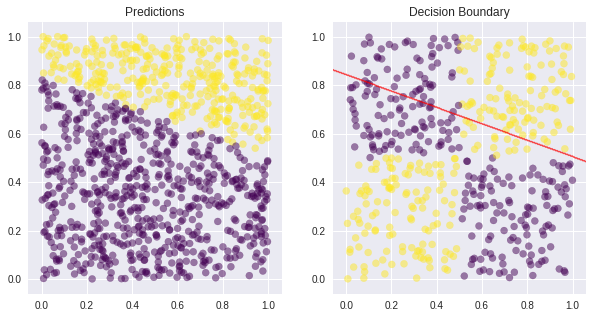

In [0]:
# training data
x_train, y_train = nn.generate_training_data(num_samples=500, input_dim=2, func=nn.XOR)

# create a new NN
model = nn.singleLayerPerceptron()

# fit the NN
model.fit(x_train, y_train, epochs=100, batch_size=20, verbose=0)

# generate test data
x_test = np.random.random((1000, 2))

# predict test data outputs
y_test = model.predict(x_test)

# plot it
nn.prediction_and_boundary_plot(model, x_test, y_test, x_train, y_train)

And let's animate that.

In [0]:
# training data
x_train, y_train = nn.generate_training_data(num_samples=500, input_dim=2, func=nn.XOR)

# create a new NN
model = nn.singleLayerPerceptron()

# generate test data
x_test = np.random.random((300, 2))

# animate it
nn.prediction_and_boundary_animation(model, x_train, y_train, x_test, batch_size=7, frames=200, epochs_per_frame=1)

# What happened?
What happened?!?! The perceptron is incapable of learning the XOR function. Can you explain why?

In a 1969 publication, Minsky and Papert showed that a single layer perceptron could not learn an XOR function. The reason: single layer perceptrons can only discriminate patterns that are ***linearly separable***, meaning the classes can be separated by drawing a single straight line. Can you draw a single straight line to seprate the yellow from purple classes in the XOR function above? No, it's not possible. In the animation, we see the decisions boundary jumping around wildly, never settling down into a location that works.

At the time of Minsky and Papert's publication, it was commonly but incorrectly assumed that the result held for multilayer perceptrons as well. However, as we'll see in the next tutorial, mutlilayer perceptrons can do a whole lot better...